In [104]:
#problem statement : several parameters finance company looks to give loan to somebody 
#predict that if a person is eligible for that loan or not 
#data--> preprocessing --> train test --> svm--> approve or reject the loan 

In [136]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [106]:
df=pd.read_csv('train.csv')

In [107]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [108]:

df.shape

(614, 13)

In [109]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [110]:
# statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [111]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [112]:
# dropping the missing values 
df=df.dropna()

In [113]:
print(df.columns) 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [114]:
df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [115]:
#replacing the valuesof 3+ to 4
df= df.replace(to_replace='3+', value=4)
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

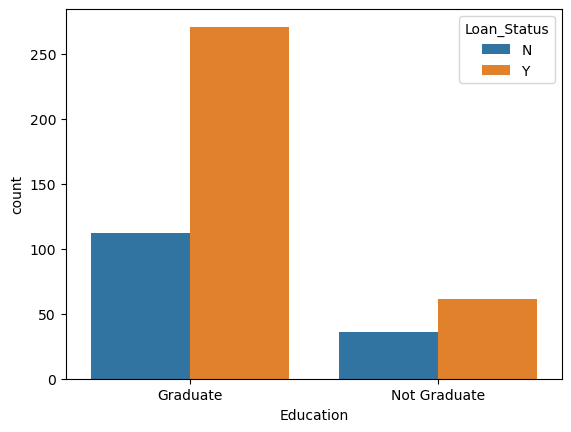

In [116]:
# data visualization 
# we need to check that loan approval will be related to other columns 
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

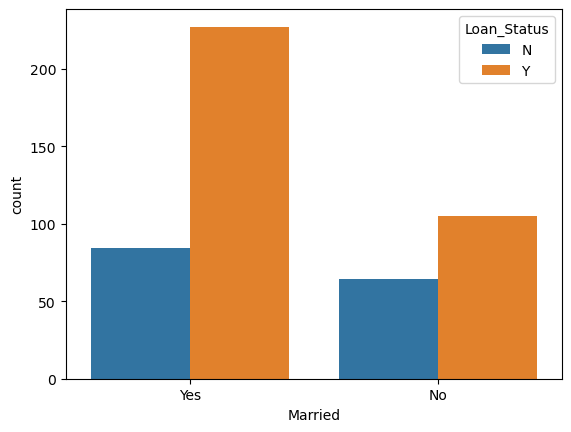

In [117]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

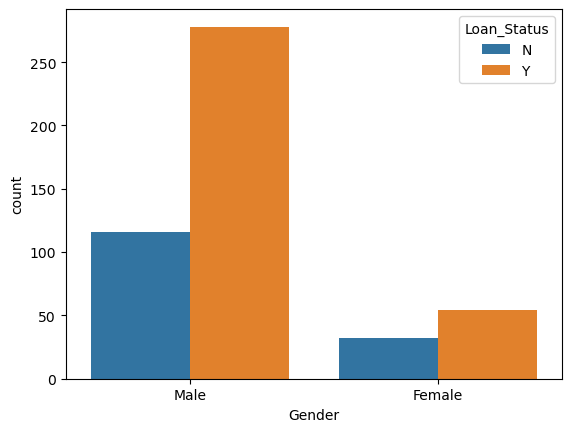

In [118]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

In [119]:
#convert categorical columns  ,
       
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()

df['Loan_Status']= le.fit_transform(df['Loan_Status'])
df['Gender']= le.fit_transform(df[ 'Gender'])
df['Married']= le.fit_transform(df['Married'])
df['Self_Employed']= le.fit_transform(df['Self_Employed'])
df['Property_Area']= le.fit_transform(df['Property_Area'])
df['Education']= le.fit_transform(df['Education'])

scaler = StandardScaler()


In [120]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [121]:
x=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [123]:
# using standard scaler 
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [124]:
model=svm.SVC(kernel='linear')

In [125]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [126]:
x_pred=model.predict(x_train)
accuracy=accuracy_score(x_pred,y_train)
accuracy

0.8125

In [127]:
x_pred=model.predict(x_test)
accuracy=accuracy_score(x_pred,y_test)
accuracy

0.7986111111111112

In [128]:
x_test.shape

(144, 11)

In [129]:
# making prediction system 
x_new=x_test[0] #1st row xtest column 
pred=model.predict([x_new])
print(pred)

if pred==0:
    print('loan approved ')
else:
    print('rejected')


[1]
rejected


In [133]:
print(y_test.iloc[0]) # putting iloc beacuse i didi standard scaler so my dataframe for x test and train converted into array
                      # it didnot recognize index ii make it understand i did iloc 

1


In [131]:
print(type(x_test))

<class 'numpy.ndarray'>


In [132]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [167]:
model=RandomForestClassifier(n_estimators=20, random_state=42, class_weight='balanced',min_samples_split=10, max_depth=10, 
                                   min_samples_leaf=2, max_features='sqrt')
model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=20, random_state=42)

In [168]:
x_pred=model.predict(x_train)
accuracy=accuracy_score(x_pred,y_train)
accuracy

0.9017857142857143

In [169]:
x_pred=model.predict(x_test)
accuracy=accuracy_score(x_pred,y_test)
accuracy

0.8055555555555556

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

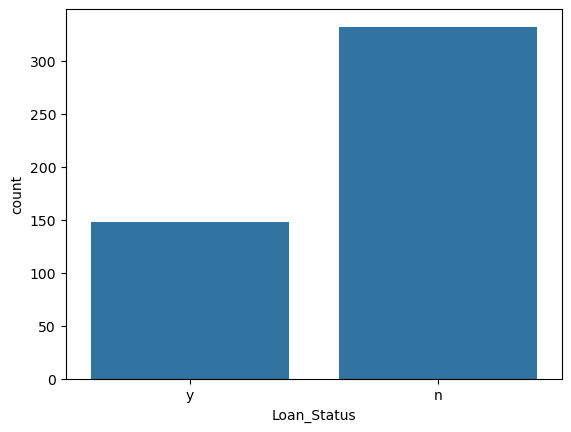

In [159]:
sns.countplot(x=df['Loan_Status'])
plt.xticks(ticks=[0,1],labels=['y','n'])
plt.show

In [172]:
from sklearn.linear_model import LogisticRegression

In [174]:
model=LogisticRegression()
model.fit(x_train,y_train)
x_pred=model.predict(x_train)
accuracy=accuracy_score(x_pred,y_train)
accuracy

0.8095238095238095

In [175]:
x_pred=model.predict(x_test)
accuracy=accuracy_score(x_pred,y_test)
accuracy

0.7986111111111112

In [ ]:
-------------------------------------END---------------------------------------